In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

impo_emporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


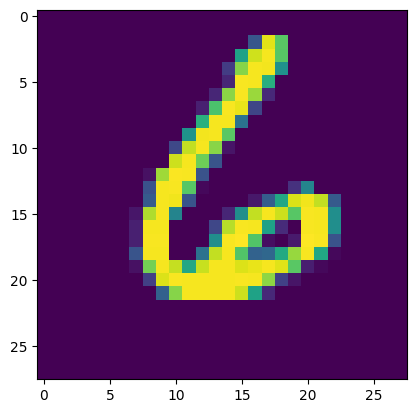

In [8]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[41998,1:].values.reshape(28,28))

In [25]:
y = df.iloc[:,0].values
x = df.iloc[:,1:].values

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split (x,y,test_size= 0.2, random_state = 42)

In [27]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print(type(x_train), type(y_train))  # Should show numpy.ndarray for both

x_train shape: (33600, 784)
y_train shape: (33600,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


In [33]:
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)


In [39]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,y_test)
acc

0.9648809523809524

In [43]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [44]:
x_train = ss.fit_transform (x_train)
x_test = ss.transform(x_test)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components  = 110)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

knn.fit(x_train_trf,y_train)
y_pred_trf = knn.predict(x_test_trf)
acc = accuracy_score(y_pred_trf , y_test)
acc

0.9516666666666667